In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
# w = !apt install tree
# print(w[-2])

In [5]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
# 폰트 관련 용도
import matplotlib.font_manager as fm
import cv2

import torch
from torch import nn, optim
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision import models, datasets, transforms
from torchinfo import summary

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
import os
import cv2

import torch
from torch import nn, optim
from torchvision import models, datasets, transforms
from torchvision.io import read_image

In [7]:
## Faster R-CNN object detection
dir(models.detection)

['FCOS',
 'FCOS_ResNet50_FPN_Weights',
 'FasterRCNN',
 'FasterRCNN_MobileNet_V3_Large_320_FPN_Weights',
 'FasterRCNN_MobileNet_V3_Large_FPN_Weights',
 'FasterRCNN_ResNet50_FPN_V2_Weights',
 'FasterRCNN_ResNet50_FPN_Weights',
 'KeypointRCNN',
 'KeypointRCNN_ResNet50_FPN_Weights',
 'MaskRCNN',
 'MaskRCNN_ResNet50_FPN_V2_Weights',
 'MaskRCNN_ResNet50_FPN_Weights',
 'RetinaNet',
 'RetinaNet_ResNet50_FPN_V2_Weights',
 'RetinaNet_ResNet50_FPN_Weights',
 'SSD300_VGG16_Weights',
 'SSDLite320_MobileNet_V3_Large_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'anchor_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos',
 'fcos_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn'

In [8]:
weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
fasterRCNN = models.detection.fasterrcnn_resnet50_fpn(weights=weights)

In [9]:
print(fasterRCNN)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [10]:
fasterRCNN = fasterRCNN.to(device)

In [11]:
fasterRCNN.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

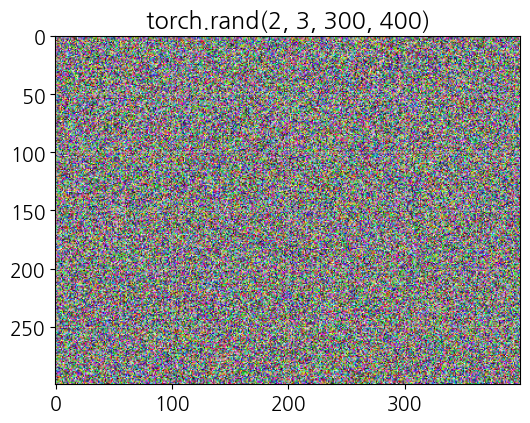

In [12]:
## output
x = torch.rand(2, 3, 300, 400)

plt.imshow(x[1].permute(1, 2, 0).numpy())
plt.title("torch.rand(2, 3, 300, 400)")
plt.show()

In [13]:
x = x.to(device)

prediction = fasterRCNN(x)
print("Faster RCNN outputs = ")

display(prediction)

Faster RCNN outputs = 


[{'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)},
 {'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)}]

In [14]:
coco_labels_list = weights.meta["categories"]
print(len(coco_labels_list)) # categories

91


In [16]:
data_dir = './figure'
img_path = os.path.join(data_dir, 'dog.jpg')
img = read_image(img_path).to(device)

print(type(img))
print(img.shape)

<class 'torch.Tensor'>
torch.Size([3, 576, 768])


In [17]:
preprocess = weights.transforms()
print(preprocess)
img = preprocess(img)
print(type(img))
print(img.shape)

batch_img = img.unsqueeze(0)
print(batch_img.shape)

ObjectDetection()
<class 'torch.Tensor'>
torch.Size([3, 576, 768])
torch.Size([1, 3, 576, 768])


In [18]:
import time

start = time.time()
pred = fasterRCNN(batch_img)

stop = time.time()

# print('start time = ', start)
# print('stop time  = ', stop)
print(f"estimation time = {(stop - start)*1000:.3f}")

estimation time = 96.807


In [53]:
print('prediction keys =',pred[0].keys())
display(pred[0]['boxes'])
print('labels =', pred[0]['labels'])
print('scores =', pred[0]['scores'])

prediction keys = dict_keys(['boxes', 'labels', 'scores'])


tensor([[130.1481, 225.9621, 319.1782, 534.0541],
        [165.7827, 105.2902, 567.0234, 448.0093],
        [468.0256,  77.0649, 678.6519, 170.2906],
        [128.2296, 141.0522, 274.6140, 380.0788],
        [127.1050, 236.7964, 224.6000, 374.7554],
        [467.8128,  82.8240, 679.5612, 167.8068],
        [711.7824,  27.8544, 760.5433, 246.2987],
        [127.2871, 113.3396, 421.0104, 398.1768],
        [ 56.5053,  85.6830, 103.9845, 128.8456],
        [599.0366, 105.5728, 620.2407, 122.8152],
        [126.4761, 132.0949, 441.0962, 403.5118],
        [134.2825, 217.0095, 322.4927, 536.1628],
        [718.2193,  27.7569, 766.2571, 270.4145],
        [675.7394,  97.5510, 718.1062, 155.4471],
        [ 59.2881,  83.3066, 100.9819, 124.1867],
        [600.8262, 107.8625, 613.9842, 120.7064],
        [129.5453, 140.5286, 587.5706, 510.7128],
        [604.4675, 109.6371, 618.2333, 122.2212],
        [ 87.1798,  71.4782, 112.6256,  86.8257],
        [685.6368,  47.6686, 756.0485, 180.4417],


labels = tensor([18,  2,  3,  2,  2,  8, 64,  2, 64,  1, 15, 17, 72, 64,  4,  1, 15,  1,
        40, 64, 15, 31, 62, 62], device='cuda:0')
scores = tensor([0.9958, 0.9864, 0.8399, 0.8283, 0.7619, 0.5380, 0.3367, 0.3080, 0.2953,
        0.2694, 0.2646, 0.1903, 0.1708, 0.1686, 0.1623, 0.1577, 0.1143, 0.0949,
        0.0776, 0.0722, 0.0702, 0.0674, 0.0651, 0.0543], device='cuda:0',
       grad_fn=<IndexBackward0>)


In [94]:
pred_dict = pred[0]
pred_dict["boxes"]
pred_dict["labels"]
pred_dict["scores"]

tensor([0.9958, 0.9864, 0.8399, 0.8283, 0.7619, 0.5380, 0.3367, 0.3080, 0.2953,
        0.2694, 0.2646, 0.1903, 0.1708, 0.1686, 0.1623, 0.1577, 0.1143, 0.0949,
        0.0776, 0.0722, 0.0702, 0.0674, 0.0651, 0.0543], device='cuda:0',
       grad_fn=<IndexBackward0>)

In [122]:
threshold = 0.8
indices = pred_dict["scores"] >= threshold

pred_boxes = pred_dict["boxes"][indices]
pred_labels = pred_dict["labels"][indices]
pred_scores = pred_dict["scores"][indices]

print(pred_scores)
print(pred_labels)

tensor([0.9958, 0.9864, 0.8399, 0.8283], device='cuda:0',
       grad_fn=<IndexBackward0>)
tensor([18,  2,  3,  2], device='cuda:0')


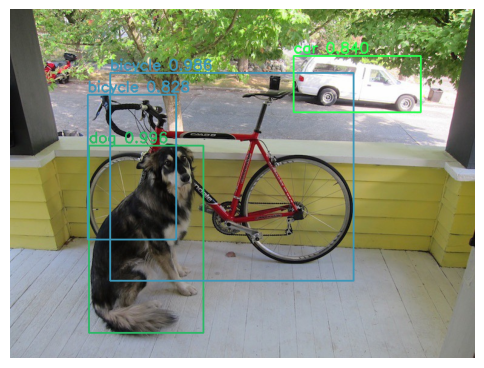

In [139]:
import random

image = img.permute(1, 2, 0).cpu().numpy()
color_array = [[random.randint(0, 255) for _ in range(3)] for _ in range(91)]
image = (image * 255).astype(np.uint8)  # 정수형(uint8)으로 변환

for i in range(len(pred_boxes)):
  x_min = int(pred_boxes[i][0])
  y_min = int(pred_boxes[i][1])
  x_max = int(pred_boxes[i][2])
  y_max = int(pred_boxes[i][3])

  color = color_array[pred_labels[i]]

  cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
  text = coco_labels_list[pred_labels[i]] + f" {pred_scores[i]:.3f}"
  cv2.putText(image, text,
              (x_min, y_min-5), 0, 0.8, color, 2)

plt.imshow(image)
plt.axis("off")
plt.show()

In [131]:
color_array[pred_labels[0]]

[39, 96, 183]

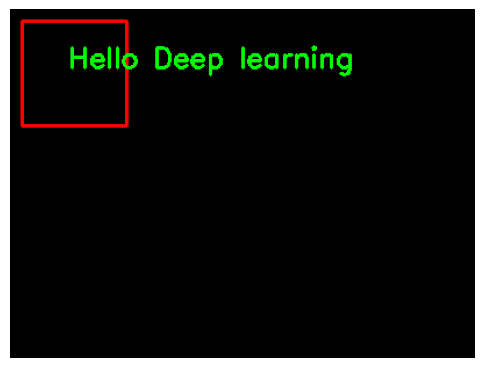

In [51]:
x = np.zeros((300, 400, 3), dtype=np.uint8)

cv2.rectangle(x, (10, 10), (100, 100), (255, 0, 0), 2)
cv2.putText(x, "Hello Deep learning", (50, 50), 0, 0.8, (0, 255, 0), 2)

plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()

In [140]:
import torchvision.transforms.functional as F

In [147]:
def show(imgs:list):
  if not isinstance(imgs, list):
    imgs = [imgs]

  fig, axs = plt.subplots(ncols = len(imgs), figsize=(12, 6), squeeze=False)

  for i, img in enumerate(imgs):
    img = F.to_pil_image(img)
    axs[0, i].imshow(img)
    axs[0, i].axis("off")

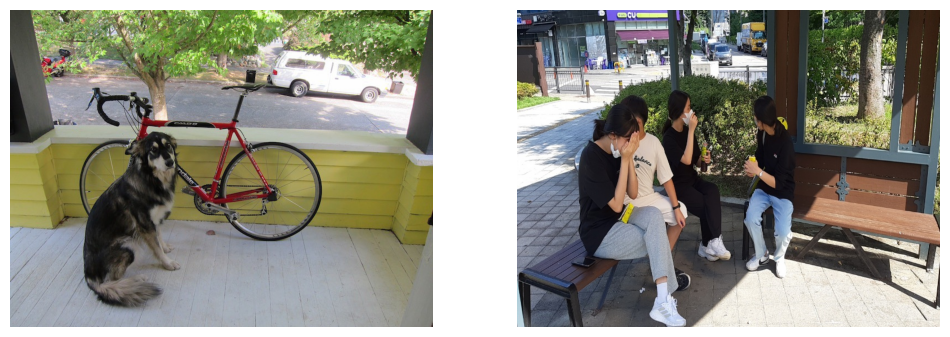

In [148]:
img2 = read_image(os.path.join(data_dir, "peoples.jpg"))

img_list = [img, img2]
show(img_list)

In [150]:
##
weights = models.segmentation.FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1
model = models.segmentation.fcn_resnet50(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:00<00:00, 182MB/s]


In [153]:
transform = weights.transforms(resize_size=None)
print(transform)

SemanticSegmentation(
    resize_size=None
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [160]:
batch = torch.stack([transform(i).to(device) for i in img_list])

batch.shape

torch.Size([2, 3, 576, 768])

In [161]:
model.eval()

output = model(batch)

In [170]:
output['out'].shape
# output['aux']

torch.Size([2, 21, 576, 768])

In [171]:
weights.meta['categories']

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [173]:
sem_class_to_idx = {cls:idx for idx, cls in enumerate(weights.meta['categories'])}

display(sem_class_to_idx)

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [181]:
# output = output["out"] # [batch, num_classes, height, width]
print("output shape =", output.shape)

output shape = torch.Size([2, 21, 576, 768])


In [184]:
normalized_masks = torch.softmax(output, dim=1)
normalized_masks.shape

torch.Size([2, 21, 576, 768])

In [186]:
##
dog_and_person_masks = [
    normalized_masks[img_idx, sem_class_to_idx[cls]]
    for img_idx in range(len(img_list)) for cls in ("dog", "person")
]

len(dog_and_person_masks)

4

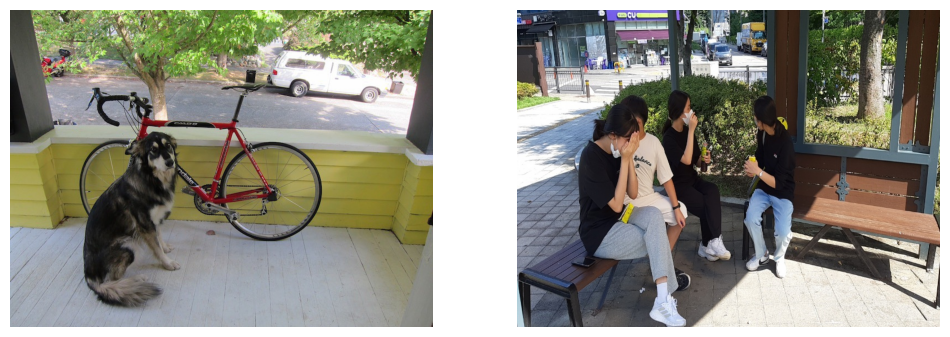

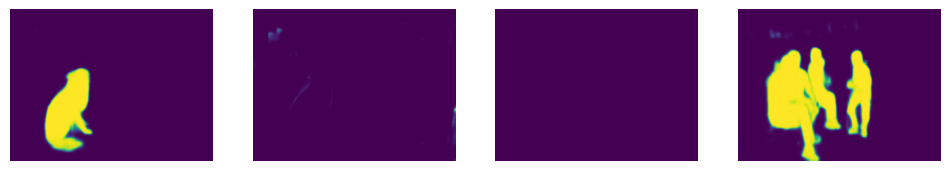

In [188]:
show(img_list)
show(dog_and_person_masks)

In [192]:
boolean_dog_masks = (normalized_masks.argmax(dim=1) == sem_class_to_idx["person"])|\
                    (normalized_masks.argmax(dim=1) == sem_class_to_idx["dog"])

boolean_dog_masks.shape

torch.Size([2, 576, 768])

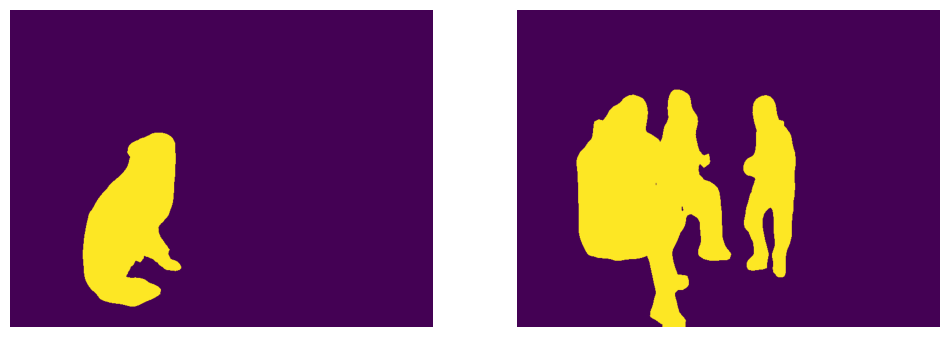

In [195]:
boolean_dog_masks_float = [m.float() for m in boolean_dog_masks]

show(boolean_dog_masks_float)

In [196]:
from torchvision.utils import draw_segmentation_masks

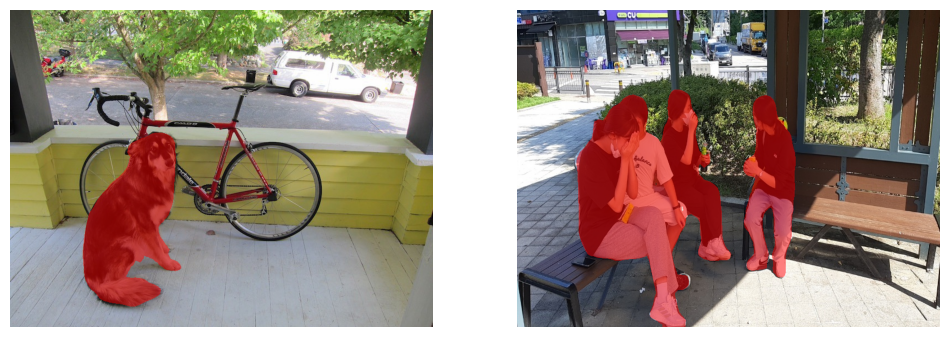

In [200]:
dogs_with_masks = [
    draw_segmentation_masks(img, masks=mask, colors="red", alpha=0.5)
    for img, mask in zip(img_list, boolean_dog_masks)
]

show(dogs_with_masks)